In [1]:
import pandas as pd 
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer
import numpy as np
from sklearn.model_selection import train_test_split 
from sklearn import metrics
from sklearn.metrics import accuracy_score
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt
from sklearn.utils import class_weight
from sklearn.metrics import f1_score, classification_report, confusion_matrix
from sklearn.model_selection import RandomizedSearchCV

In [2]:
df = pd.read_csv("merge_distance_intensity.csv")

In [4]:
df.dropna(inplace=True)

df["damage_grade"] = df["damage_grade"].str.replace("Grade ", "")
df["damage_grade"] = df["damage_grade"].astype(int)
rubble = ["Damaged-Rubble unclear", "Damaged-Rubble clear", "Damaged-Rubble Clear-New building built"]
damage = ["Damaged-Used in risk", "Damaged-Repaired and used", "Damaged-Not used"]
landslide = "Covered by landslide"
nd = "Not damaged"

df["condition_post_eq"] = df["condition_post_eq"].replace(rubble, 2)
df["condition_post_eq"] = df["condition_post_eq"].replace(damage, 1)
df["condition_post_eq"] = df["condition_post_eq"].replace(landslide, 3)
df["condition_post_eq"] = df["condition_post_eq"].replace(nd, 0)

df["land_surface_condition"] = df["land_surface_condition"].replace("Flat", 0)
df["land_surface_condition"] = df["land_surface_condition"].replace("Moderate slope", 1)
df["land_surface_condition"] = df["land_surface_condition"].replace("Steep slope", 2)

df["foundation_type"] = df["foundation_type"].replace("Other",0)
df["foundation_type"] = df["foundation_type"].replace("Mud mortar-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Cement-Stone/Brick",1)
df["foundation_type"] = df["foundation_type"].replace("Bamboo/Timber",3)
df["foundation_type"] = df["foundation_type"].replace("RC",2)

df["roof_type"] = df["roof_type"].replace("RCC/RB/RBC",0)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Light roof",1)
df["roof_type"] = df["roof_type"].replace("Bamboo/Timber-Heavy roof",2)

df["ground_floor_type"] = df["ground_floor_type"].replace("Mud",1)
df["ground_floor_type"] = df["ground_floor_type"].replace("Brick/Stone",2)
df["ground_floor_type"] = df["ground_floor_type"].replace("RC",3)
df["ground_floor_type"] = df["ground_floor_type"].replace("Timber",4)
df["ground_floor_type"] = df["ground_floor_type"].replace("Other",0)

df["other_floor_type"] = df["other_floor_type"].replace("Not applicable",0)
df["other_floor_type"] = df["other_floor_type"].replace("TImber/Bamboo-Mud",3)
df["other_floor_type"] = df["other_floor_type"].replace("Timber-Planck",2)
df["other_floor_type"] = df["other_floor_type"].replace("RCC/RB/RBC",1)

df["position"] = df["position"].replace("Not attached",0)
df["position"] = df["position"].replace("Attached-1 side",1)
df["position"] = df["position"].replace("Attached-2 side",2)
df["position"] = df["position"].replace("Attached-3 side",3)

df = pd.get_dummies(data = df, columns = ["plan_configuration"])



In [5]:
df.columns

Index(['Unnamed: 0', 'vdcmun_id', 'building_id', 'district_id', 'ward_id',
       'count_floors_pre_eq', 'count_floors_post_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq', 'height_ft_post_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other',
       'condition_post_eq', 'damage_grade', 'technical_solution_proposed',
       'Distance.from.Epicentre', 'Intensity',
       'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'pl

In [7]:
X = df[['count_floors_pre_eq', 'age_building',
       'plinth_area_sq_ft', 'height_ft_pre_eq',
       'land_surface_condition', 'foundation_type', 'roof_type',
       'ground_floor_type', 'other_floor_type', 'position',
       'has_superstructure_adobe_mud', 'has_superstructure_mud_mortar_stone',
       'has_superstructure_stone_flag',
       'has_superstructure_cement_mortar_stone',
       'has_superstructure_mud_mortar_brick',
       'has_superstructure_cement_mortar_brick', 'has_superstructure_timber',
       'has_superstructure_bamboo', 'has_superstructure_rc_non_engineered',
       'has_superstructure_rc_engineered', 'has_superstructure_other', 'plan_configuration_Building with Central Courtyard',
       'plan_configuration_E-shape', 'plan_configuration_H-shape',
       'plan_configuration_L-shape', 'plan_configuration_Multi-projected',
       'plan_configuration_Others', 'plan_configuration_Rectangular',
       'plan_configuration_Square', 'plan_configuration_T-shape',
       'plan_configuration_U-shape', "Intensity"]]
y = df["damage_grade"]

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0, stratify=y)

In [11]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1)
clf.fit(X_train,y_train)

In [37]:
clf_pred = clf.predict(X_test)

              precision    recall  f1-score   support

           1       0.59      0.67      0.63     13537
           2       0.35      0.26      0.30     14523
           3       0.38      0.33      0.35     23075
           4       0.45      0.42      0.43     31780
           5       0.65      0.74      0.70     49342

    accuracy                           0.53    132257
   macro avg       0.48      0.49      0.48    132257
weighted avg       0.52      0.53      0.52    132257

Accuracy: 0.5337940524887151
Misclassification Rate: 0.46620594751128486
Precision: 0.5337940524887151
Recall: 0.5337940524887151
F-measure: 0.5337940524887151


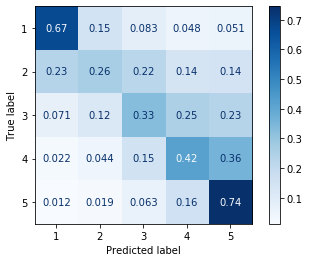

In [38]:
print(classification_report(y_test, clf_pred))
# Accuracy - Multinomial 
accuracy_clf = accuracy_score(y_test,clf_pred)
print("Accuracy:", accuracy_clf)

#Misclassification rate 
misclassified_clf = 1 - accuracy_clf
print("Misclassification Rate:", misclassified_clf)

# Precision and Recall
precision_clf = metrics.precision_score(y_test,clf_pred, average = 'micro')
recall_clf = metrics.recall_score(y_test, clf_pred, average = 'micro')
f_measure_clf = metrics.f1_score(y_test, clf_pred, average = 'micro')
print("Precision:",precision_clf)
print("Recall:",recall_clf)
print("F-measure:",f_measure_clf)
disp = plot_confusion_matrix(clf, X_test, y_test, cmap=plt.cm.Blues,normalize="true")

In [55]:
gs.best_params_

{'randomforestclassifier__min_samples_leaf': 5,
 'randomforestclassifier__n_estimators': 100}

In [12]:
selected_features = ['foundation_type', 
                     'plinth_area_sq_ft', 
                     'height_ft_pre_eq',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_bamboo', 'Intensity', 'ground_floor_type','roof_type']
train_values_subset = X_train[selected_features]
test_values = X_test[selected_features]

0.546723424847078


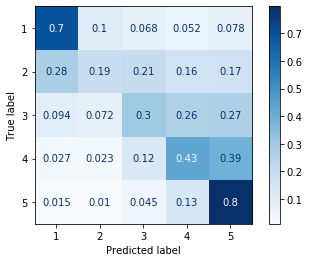

In [15]:
clf = RandomForestClassifier(random_state=1, min_samples_leaf=5, n_estimators=100)
clf.fit(train_values_subset, y_train)
in_sample_preds = clf.predict(test_values)
print(f1_score(y_test, in_sample_preds, average='micro'))
disp = plot_confusion_matrix(clf, test_values, y_test, cmap=plt.cm.Blues,normalize="true")

In [109]:
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
X_sm, y_sm = smote.fit_sample(train_values_subset, y_train)

In [110]:
# in_sample_preds = gs.predict(X_sm)
clf = RandomForestClassifier(random_state=1)
clf.fit(X_sm, y_sm)
in_sample_preds = clf.predict(test_values)
f1_score(y_test, in_sample_preds, average='micro')

0.5131599839706027

In [149]:
#RF with weights tweaked
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_train),
                                                 y_train)
class_weight_dict = dict(enumerate(class_weights, 1))
clf = RandomForestClassifier(random_state=1)
class_weight_dict

{1: 1.9539964541626653,
 2: 1.8213978309519712,
 3: 1.1463163596966415,
 4: 0.8323237885462555,
 5: 0.5360825264608572}

In [150]:
clf.fit(train_values_subset, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=1, verbose=0,
                       warm_start=False)

In [151]:
in_sample_preds = clf.predict(test_values)
f1_score(y_test, in_sample_preds, average='micro')

0.5137799889608867

In [152]:
from imblearn.over_sampling import SMOTE
smote = SMOTE("minority")
X_sm, y_sm = smote.fit_sample(train_values_subset, y_train)

#RF with weights tweaked
from sklearn.utils import class_weight
class_weights = class_weight.compute_class_weight('balanced',
                                                 np.unique(y_sm),
                                                 y_sm)
class_weight_dict = dict(enumerate(class_weights, 1))
clf = RandomForestClassifier(random_state=1)

clf.fit(X_sm, y_sm)

in_sample_preds = clf.predict(test_values)
f1_score(y_test, in_sample_preds, average='micro')

0.5129785190953976

In [ ]:
from sklearn.model_selection import RandomizedSearchCV# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]

In [ ]:
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

In [ ]:
selected_features = ['foundation_type', 
                     'plinth_area_sq_ft', 
                     'height_ft_pre_eq',
                     'count_floors_pre_eq',
                     'land_surface_condition',
                     'has_superstructure_bamboo', 'Intensity', 'ground_floor_type','roof_type']
train_values_subset = X_train[selected_features]
test_values = X_test[selected_features]

In [ ]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 3,
                        cv = 3, verbose=2, random_state=42, n_jobs = 1)# Fit the random search model
rf.fit(train_values_subset, y_train)

In [ ]:
rf.best_params_

{'bootstrap': True,
 'max_depth': 50,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [ ]:
in_sample_preds = rf.predict(test_values)
f1_score(y_test, in_sample_preds, average='micro')